Exercice 2

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import jv, yv


On commence par écrire les fonctions de récurrence :

In [41]:

def rec_up(f0, f1, x, n_max):
    """Récurrence ascendante : f_{n+1} = (2n/x)f_n - f_{n-1}"""
    f = [f0, f1]
    for n in range(1, n_max):
        f_next = (2 * n / x) * f[-1] - f[-2]
        f.append(f_next)
    return np.array(f)

def rec_down(f_nmax, f_nmax_minus1, x, n_max):
    """Récurrence descendante : f_{n-1} = (2n/x)f_n - f_{n+1}"""
    f = [0] * (n_max + 1)
    f[-1] = f_nmax
    f[-2] = f_nmax_minus1
    for n in reversed(range(1, n_max - 1)):
        f[n-1] = (2 * n / x) * f[n] - f[n+1]
    return np.array(f)


Maintenant, on ajoute les variables ainsi que les valeurs exactes et les récurrence (ascendante et descendante pour J et Y).

In [42]:

x = 1.0
n_max = 20
n_values = np.arange(0, n_max + 1)

# Valeurs exactes (de référence)
J_exact = jv(n_values, x)
Y_exact = yv(n_values, x)

# Récurrence ascendante pour J
J_up = rec_up(J_exact[0], J_exact[1], x, n_max)

# Récurrence descendante pour J
J_down = rec_down(J_exact[-1], J_exact[-2], x, n_max)

# Récurrence ascendante pour Y
Y_up = rec_up(Y_exact[0], Y_exact[1], x, n_max)

# Récurrence descendante pour Y
Y_down = rec_down(Y_exact[-1], Y_exact[-2], x, n_max)

Avec toutes ces données, on peut calculer les erreurs relatives pour les J et Y

In [43]:
err_J_up = np.abs((J_up - J_exact) / J_exact)
err_J_down = np.abs((J_down - J_exact) / J_exact)
err_Y_up = np.abs((Y_up - Y_exact) / Y_exact)
err_Y_down = np.abs((Y_down - Y_exact) / Y_exact)

Enfin, on peut plot le graphique avec toutes les données:

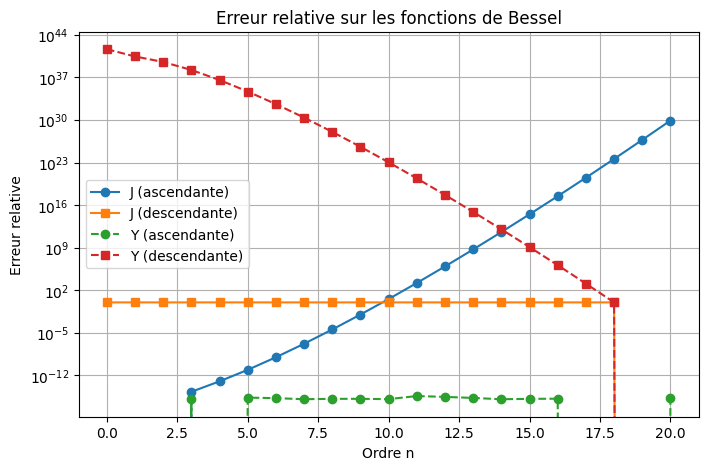

In [44]:

plt.figure(figsize=(8,5))
plt.semilogy(n_values, err_J_up, 'o-', label="J (ascendante)")
plt.semilogy(n_values, err_J_down, 's-', label="J (descendante)")
plt.semilogy(n_values, err_Y_up, 'o--', label="Y (ascendante)")
plt.semilogy(n_values, err_Y_down, 's--', label="Y (descendante)")
plt.xlabel("Ordre n")
plt.ylabel("Erreur relative")
plt.title("Erreur relative sur les fonctions de Bessel")
plt.legend()
plt.grid(True)
plt.show()


Dans ce graphique, on peut voir que les courbes J(ascendante) et Y (descendante) on des erreurs qui ne sont pas stables tandis que Y(ascendante) et J (descendante) sont très stable et bas.

L'alorithm de Miller est écrit ci-dessous.

In [45]:
def miller_J(x, n_max, N=50):

    f = np.zeros(N+2)
    f[-1] = 0.0  # condition arbitraire
    f[-2] = 1.0  # condition de normalisation arbitraire

    # Récurrence descendante
    for n in range(N, 0, -1):
        f[n-1] = (2*n/x)*f[n] - f[n+1]

    # Normalisation pour correspondre à J_0(x)
    norm_factor = jv(0, x) / f[0]
    f *= norm_factor
    return f[:n_max+1]


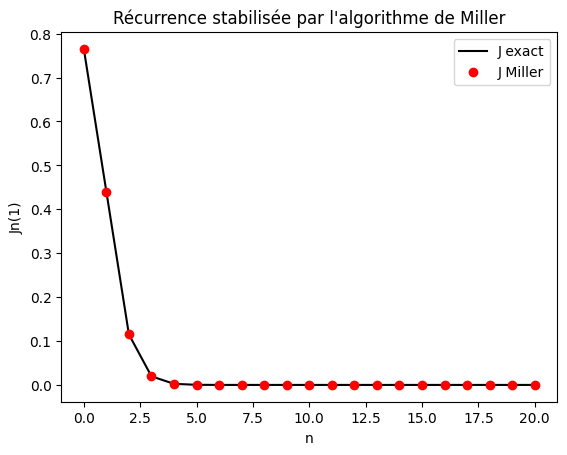

In [46]:
J_miller = miller_J(1.0, 20)
plt.plot(n_values, J_exact[:len(n_values)], 'k-', label='J exact')
plt.plot(n_values, J_miller, 'ro', label='J Miller')
plt.legend()
plt.xlabel("n")
plt.ylabel("Jn(1)")
plt.title("Récurrence stabilisée par l'algorithme de Miller")
plt.show()
